In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
msno.matrix(df);
import warnings
warnings.filterwarnings("ignore")

In [128]:
file_path = "/mnt/c/Users/user/OneDrive/Desktop/foursquare-location-matching-parquet/train.parquet"

In [129]:
df = pd.read_parquet(file_path)

In [130]:
df.head(3)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,None,None,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,None,None,None,None,BR,None,None,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,None,None,None,None,TH,None,None,Salons / Barbershops,P_b1066599e78477


In [131]:
df.tail(3)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
1138809,E_ffffc572b4d35b,İzmir Adnan Menderes Havaalanı,38.423733,27.142826,None,İzmir,None,None,TR,None,None,Airport Services,P_ae96252a6a9380
1138810,E_ffffca745329ed,焼肉 和家,35.710712,139.775000,上野6-13-6,Taitō,東京都,110-0005,JP,None,338362989,BBQ Joints,P_146662f246d418
1138811,E_ffffe6f4652fbb,Waihi Beach,-37.417042,175.950466,None,Waihi Beach,Bay Of Plenty,3611,NZ,None,None,Surf Spots,P_ea6578bf39b406


In [132]:
df.sample(3)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
1059244,E_ee0bb2dc5e30a6,Ben's,3.157020,101.712776,Suria KLCC,Kuala Lumpur,WP Kuala Lumpur,50088,MY,http://www.thebiggroup.co/bens,321631655,Cafés,P_1475d073b54c3d
1135283,E_ff33c7d915ebc7,Maaf,50.489950,2.954842,114 Rue Edouard Plachez,Carvin,Hauts-de-France,62220,FR,https://www.maaf.fr/assurance/agence-carvin,+33321795050,Financial or Legal Services,P_09a49af5b05e20
747825,E_a801b3b61a8d15,Cold Shivers Point,39.031156,-108.654203,None,None,CO,None,US,None,None,Other Great Outdoors,P_4e32427c25570e


In [133]:
df.shape

(1138812, 13)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138812 entries, 0 to 1138811
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1138812 non-null  object 
 1   name               1138811 non-null  object 
 2   latitude           1138812 non-null  float64
 3   longitude          1138812 non-null  float64
 4   address            742191 non-null   object 
 5   city               839623 non-null   object 
 6   state              718226 non-null   object 
 7   zip                543386 non-null   object 
 8   country            1138801 non-null  object 
 9   url                267724 non-null   object 
 10  phone              342855 non-null   object 
 11  categories         1040505 non-null  object 
 12  point_of_interest  1138812 non-null  object 
dtypes: float64(2), object(11)
memory usage: 112.9+ MB


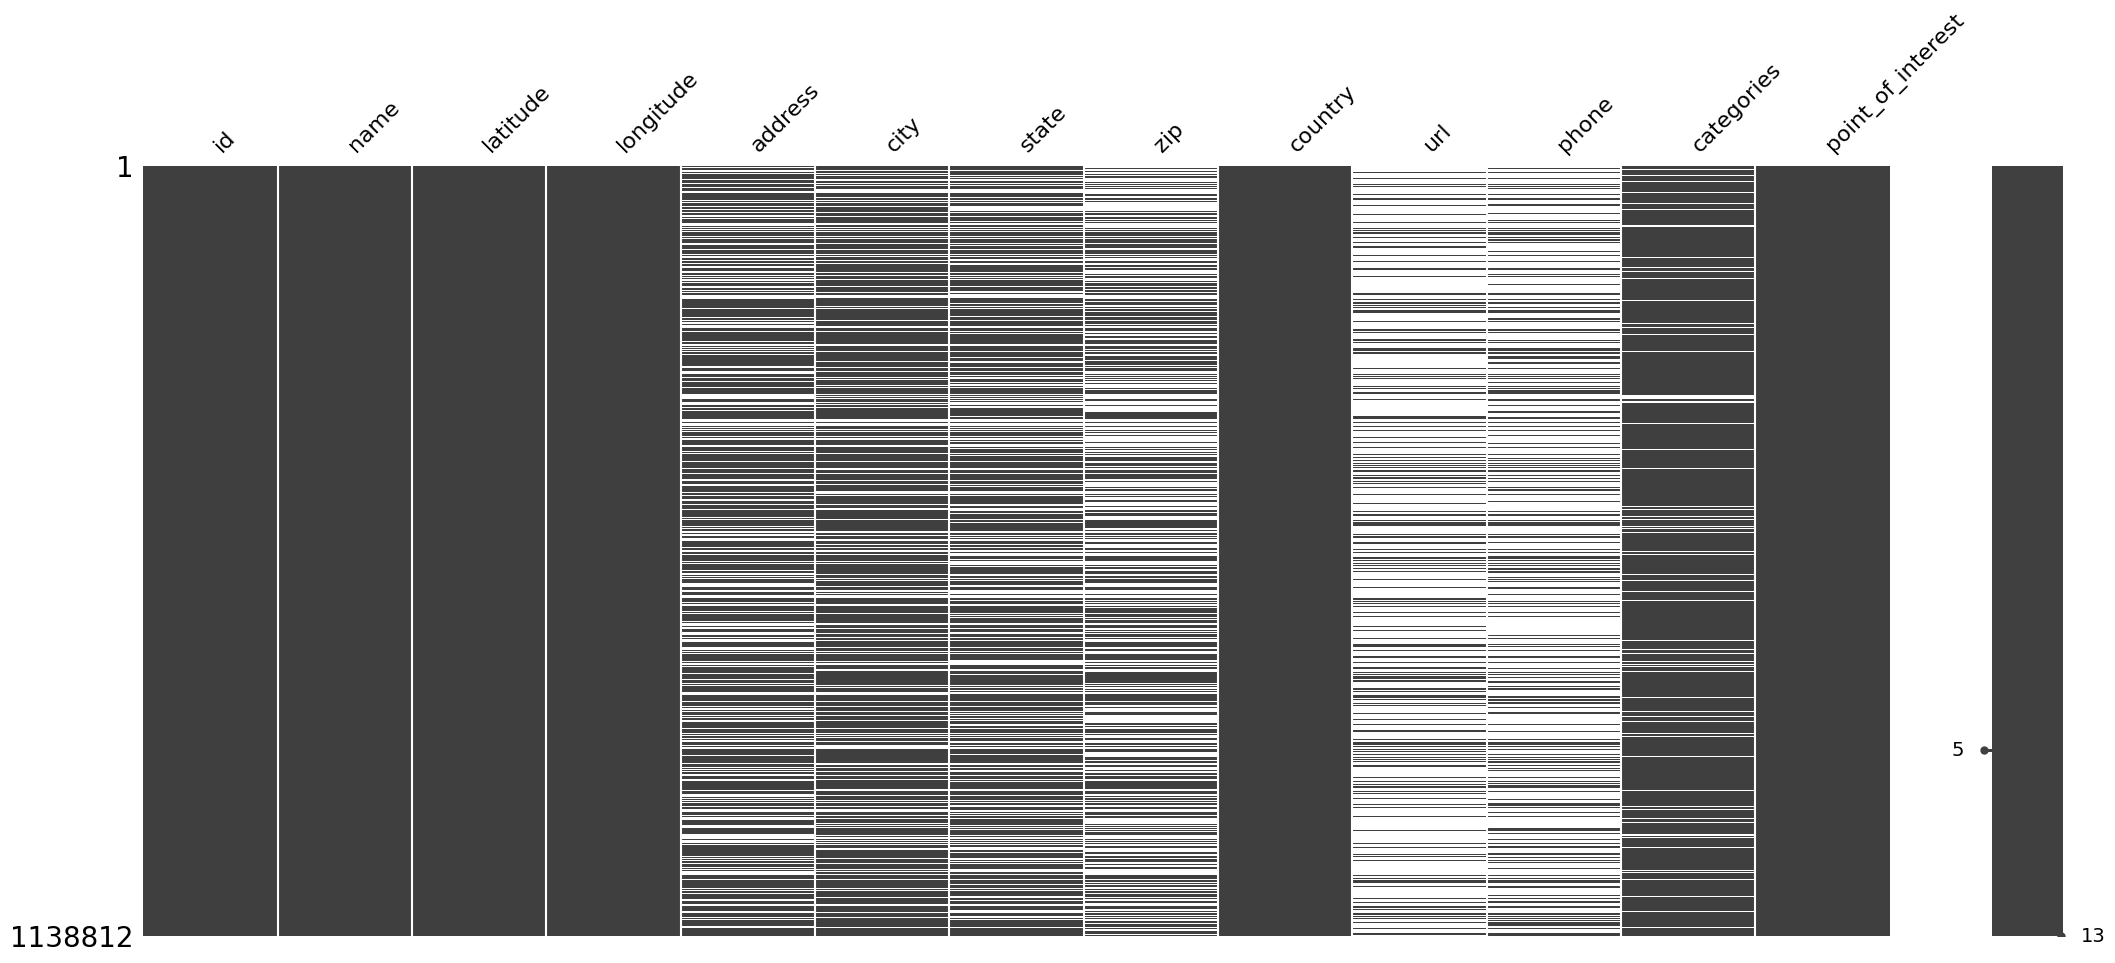

In [135]:
msno.matrix(df);

## ID

- All Id startwith 'E'
- All Id Length is 16
- All Id is Unique

In [136]:
## All Id startwith 'E'
sum(df["id"].str.startswith("E") == False)

0

In [137]:
## All Id Length is 16
sum(df["id"].apply(len) != 16)

0

In [138]:
df["id"].nunique() == df.shape[0]

True

## Name

In [139]:
df['name'].isna().sum()

1

In [140]:
df[df['name'].isna() == True]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
750648,E_a8a20800af4423,None,40.822332,-96.689102,None,None,AK,None,US,None,None,None,P_be5d12315d8588


In [141]:
df["name"].nunique()

842086

In [142]:
df["name"].duplicated().sum()

296725

In [143]:
df["name"].value_counts()[:50]

Starbucks                       5637
McDonald's                      3370
Redbox                          3190
Subway                          2024
Payless ShoeSource              1950
7-Eleven                        1911
KFC                             1720
Burger King                     1468
Shell                           1296
Pizza Hut                       1032
Dunkin'                          902
Bankamatik                       830
7-Eleven (เซเว่น อีเลฟเว่น)      827
Walmart Tires & Lube             792
Сбербанк                         741
Walmart Supercenter              730
SUBWAY                           726
AT&T                             720
Walmart Auto Care Centers        659
H&M                              542
Domino's Pizza                   531
XFINITY Store by Comcast         517
Circle K                         514
US Post Office                   510
T-Mobile                         493
Costa Coffee                     475
Time Warner Cable                464
J

In [144]:
name_value_counts = df["name"].value_counts()[:10]
name_index = name_value_counts.index
name_freq = name_value_counts.values


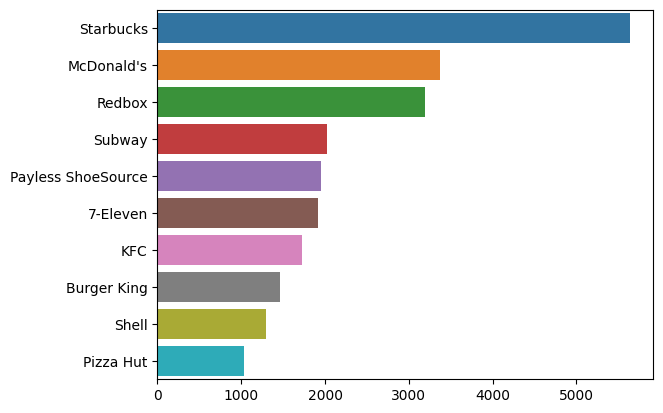

In [145]:
sns.barplot(x=name_freq, y=name_index);

In [146]:
name_freq

array([5637, 3370, 3190, 2024, 1950, 1911, 1720, 1468, 1296, 1032])

In [147]:
## we have 4 name that are just number

In [148]:
df[df["name"].str.isdigit() == True]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
113600,E_197676a3055736,６６９,35.645634,139.508098,東京都稲城市東長沼６６９,稲城市,東京都,None,JP,None,None,None,P_dc180eac60e44d
480850,E_6c0fd52e67dac0,６７１,35.645634,139.508098,東京都稲城市東長沼６７１,稲城市,東京都,None,JP,None,None,None,P_5dabf472b4b718
574652,E_812b6ab8af4dc5,６６５,35.645640,139.508304,東京都稲城市東長沼６６５,稲城市,東京都,None,JP,None,None,None,P_6861320c80dbd5
920490,E_cec29c825a6571,６７３,35.645634,139.508098,東京都稲城市東長沼６７３,稲城市,東京都,None,JP,None,None,None,P_f29738b6307a7e


## Latitude & Longitude

In [149]:
df[['latitude', 'longitude']].isna().sum()

latitude     0
longitude    0
dtype: int64

In [150]:
df[['latitude', 'longitude']].duplicated().sum()

9965

In [151]:
df[df[['latitude', 'longitude']].duplicated(keep=False) == True].sort_values("latitude")[:6].style.background_gradient(subset=["latitude", "longitude"])

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
424451,E_5f5cdeb1bcdbdb,Ofis,-80.857570,-79.364716,None,None,None,None,AQ,None,None,None,P_0f314009d32f7b
985817,E_dd78429f630d58,Ofis sanat sokağı,-80.857570,-79.364716,None,None,None,None,AQ,None,None,None,P_0f314009d32f7b
391740,E_58001cda4b9f3e,Quiosque Chopp Brahma - Shopping Avenida Center,-77.000000,11.000000,"Av. Mauá, 458, Zona 01",Maringá,Paraná,87013040,AQ,None,None,Ski Lodges,P_325746cace7242
948551,E_d5112232bbb7a6,cavillano cebicheria,-77.000000,11.000000,None,Arequipa,Arequipa,None,AQ,None,None,Movie Theaters,P_204061378a6b1c
968656,E_d99788472ed3d1,JOH CARTELES,-51.615611,-69.243911,avenida parque industrial 531,Río Gallegos,Santa Cruz,9400,AR,http://www.johcarteles.com,+542966421375,Advertising Agencies,P_88db6cedf5756f
728095,E_a38e5f7a388d63,JOH CARTELES,-51.615611,-69.243911,Avenida Parque Industrial 531,Río Gallegos,Santa Cruz,9400,AR,http://www.johcarteles.com,+542966421375,Advertising Agencies,P_88db6cedf5756f


In [152]:
df[df[['latitude', 'longitude']].duplicated(keep=False) == True].shape

(17325, 13)

In [153]:
#!pip install folium

#### Map Visualization:

```

import folium
import pandas as pd

# Create a map centered around the mean latitude and longitude
start_coords = (df['latitude'].mean(), df['longitude'].mean())
m = folium.Map(location=start_coords, zoom_start=2)

# Add points to the map
for idx, row in df.iterrows():
    folium.Marker(
        location=(row['latitude'], row['longitude']),
        popup=row['name']
    ).add_to(m)

# Save the map to an HTML file
#m.save('foursquare_map.html')

from folium.plugins import MarkerCluster

m = folium.Map(location=start_coords, zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker(
        location=(row['latitude'], row['longitude']),
        popup=row['name']
    ).add_to(marker_cluster)

m.save('foursquare_map_clustered.html')

from folium.plugins import HeatMap

m = folium.Map(location=start_coords, zoom_start=2)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

m.save('foursquare_heatmap.html')

from IPython.display import display
display(m)

```

## Address

In [157]:
df[['address']].isna().sum()

address    396621
dtype: int64

In [163]:
print(f"address: {round((396621 / df.shape[0]) * 100,2)}% Missing Value!")

address: 34.83% Missing Value!


In [164]:
df['address'].value_counts()

Terminal 1                     261
日本                             221
Siam Paragon                   174
Terminal 2                     169
丸の内1-9-1                       159
                              ... 
победа 60                        1
Vaļņu Iela                       1
Manningham Lane Retail Park      1
Sirirat                          1
上野6-13-6                         1
Name: address, Length: 558154, dtype: int64

In [165]:
address_value_counts = df["address"].value_counts()[:10]
address_index = address_value_counts.index
address_freq = address_value_counts.values

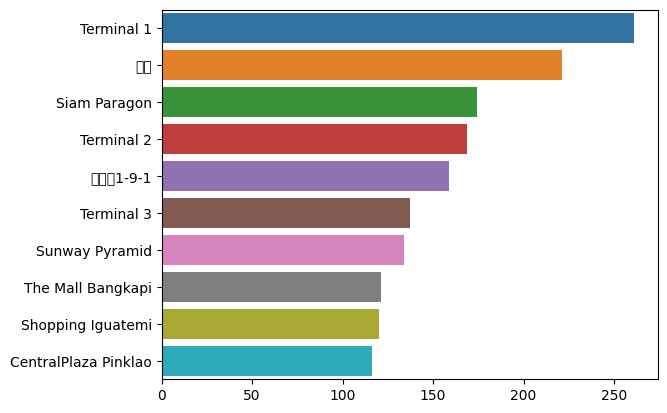

In [169]:
sns.barplot(x=address_freq, y=address_index);

## City

In [171]:
df['city'].isna().sum()

299189

In [173]:
df['city'].nunique()

68105

In [174]:
df['city'].value_counts()

Singapore         10259
Москва             9643
Bandung            8745
New York           8666
İstanbul           6455
                  ...  
Hassloch/Pfalz        1
Rattanaburi           1
örebro                1
Üçkuyular             1
광화문                   1
Name: city, Length: 68105, dtype: int64

In [176]:
city_value_counts = df["city"].value_counts()[:10]
city_index = city_value_counts.index
city_freq = city_value_counts.values

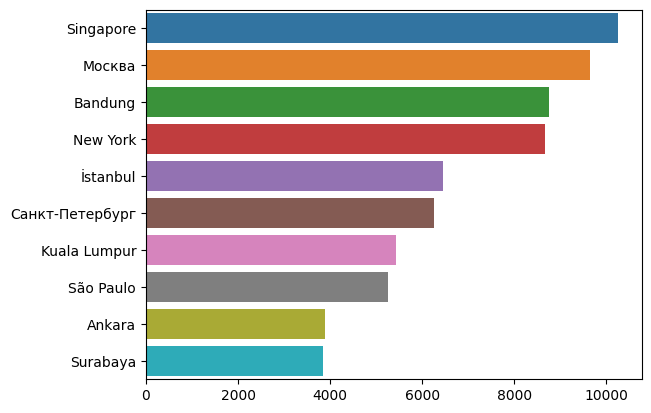

In [177]:
sns.barplot(x=city_freq, y=city_index);

In [181]:
df[df["city"] == 'Istanbul'].shape

(2542, 13)

In [182]:
df[df["city"] == 'istanbul'].shape

(569, 13)

In [184]:
df[df["city"] == 'İstanbul'].shape

(6455, 13)

| we must be fix format for values that store in city column !!!!

## State

In [204]:
from loguru import logger

In [209]:
def feature_overview(col_name):
    logger.info(f"number of Missing Values: {df[col_name].isna().sum()}")
    logger.info(f"Percent of Missing Values: {round((df[col_name].isna().sum() / df.shape[0]) * 100,2)}%")
    df[col_name].value_counts()[:10].plot(kind="bar")
    logger.info(df[col_name].value_counts()[:30])
    

In [190]:
df["state"].isna().sum()

420586

In [191]:
print(f"address: {round((420586 / df.shape[0]) * 100,2)}% Missing Value!")

address: 36.93% Missing Value!


<Axes: >

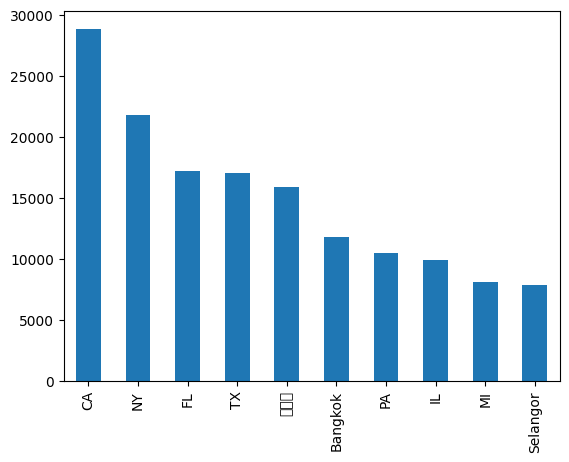

In [194]:
df["state"].value_counts()[:10].plot(kind="bar")

## Zip	

In [200]:
df[df["state"] == "CA"].shape

(28863, 13)

In [199]:
df[df["state"] == "Ca"].shape

(35, 13)

In [201]:
df[df["state"] == "ca"].shape

(11, 13)

## country	

2024-06-09 15:21:54.625 | INFO     | __main__:feature_overview:2 - number of Missing Values: 11
2024-06-09 15:21:54.652 | INFO     | __main__:feature_overview:3 - Percent of Missing Values: 0.0%
2024-06-09 15:21:54.736 | INFO     | __main__:feature_overview:5 - US    245284
TR    115177
ID    110796
JP     70032
TH     58808
RU     57030
BR     51241
MY     46326
BE     25821
GB     25544
PH     22180
MX     21396
SG     21005
KR     19087
DE     17813
FR     14174
ES     12923
CA     11927
IT     11395
SA     10867
AU     10449
UA      9864
CL      7788
NL      7713
CN      7445
FI      6634
GR      5850
AR      5255
HK      5076
CZ      4920
Name: country, dtype: int64


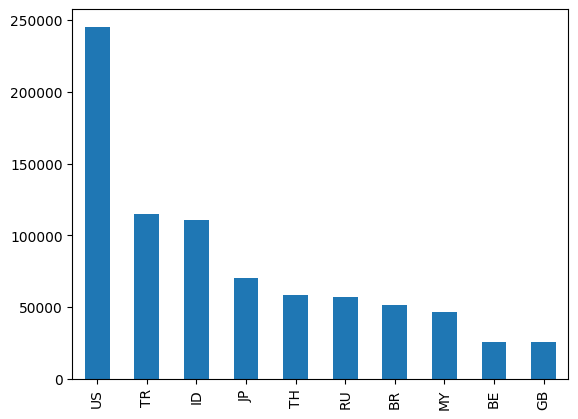

In [210]:
feature_overview("country")

## URL

2024-06-09 15:22:38.236 | INFO     | __main__:feature_overview:2 - number of Missing Values: 871088
2024-06-09 15:22:38.259 | INFO     | __main__:feature_overview:3 - Percent of Missing Values: 76.49%
2024-06-09 15:22:38.484 | INFO     | __main__:feature_overview:5 - https://www.sej.co.jp                         921
http://www.7eleven.co.th                      833
http://www.payless.com/                       687
https://www.dunkindonuts.com                  643
https://www.family.co.jp                      611
http://www.redbox.com                         601
http://www.sberbank.ru                        587
http://www.starbucks.com/                     444
http://www.isbank.com.tr                      427
https://www.kroger.com                        377
http://www.family.co.jp                       366
http://www.barackobama.com/offices            358
https://www.netto-online.de                   331
http://www.starbucks.com.cn/en                312
http://dixy.ru                  

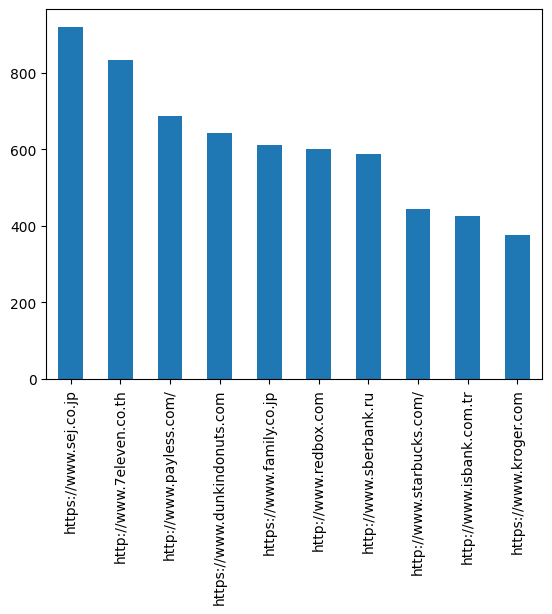

In [211]:
feature_overview("url")

## Phone

2024-06-09 15:23:07.658 | INFO     | __main__:feature_overview:2 - number of Missing Values: 795957
2024-06-09 15:23:07.682 | INFO     | __main__:feature_overview:3 - Percent of Missing Values: 69.89%
2024-06-09 15:23:07.996 | INFO     | __main__:feature_overview:5 - 8667332693        1875
+18667332693      1010
+18002758777       559
+498002000015      365
+4922120199959     363
820820001          313
+3270220200        263
+864008206998      219
+33149461720       195
+78003330303       193
8002500890         182
+81570200000       161
+443457484950      148
8009282274         142
800802800          133
88005555505        127
8889687282         106
137678             102
+18004253800        94
+18008722657        89
+34901210300        89
+78007550003        89
+18559552534        89
+498007245776       86
+73412908292        85
+74955445000        84
8444627342          77
+912268461208       73
+864008823823       70
+8215770287         68
Name: phone, dtype: int64


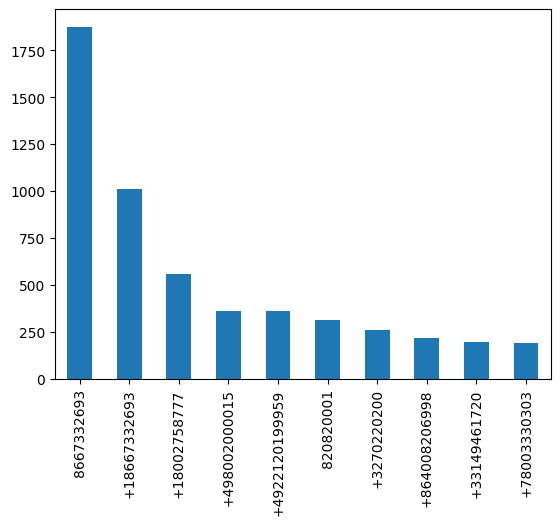

In [212]:
feature_overview("phone")

## categories

2024-06-09 15:23:51.177 | INFO     | __main__:feature_overview:2 - number of Missing Values: 98307
2024-06-09 15:23:51.209 | INFO     | __main__:feature_overview:3 - Percent of Missing Values: 8.63%
2024-06-09 15:23:51.362 | INFO     | __main__:feature_overview:5 - Residential Buildings (Apartments / Condos)    25481
Banks                                          21494
College Classrooms                             21438
Cafés                                          17805
Coffee Shops                                   17097
Offices                                        16954
Hotels                                         16583
Convenience Stores                             13530
Buildings                                      11981
Salons / Barbershops                           11922
Shopping Malls                                 11385
Gas Stations                                   10326
Fast Food Restaurants                           9963
Hospitals                                    

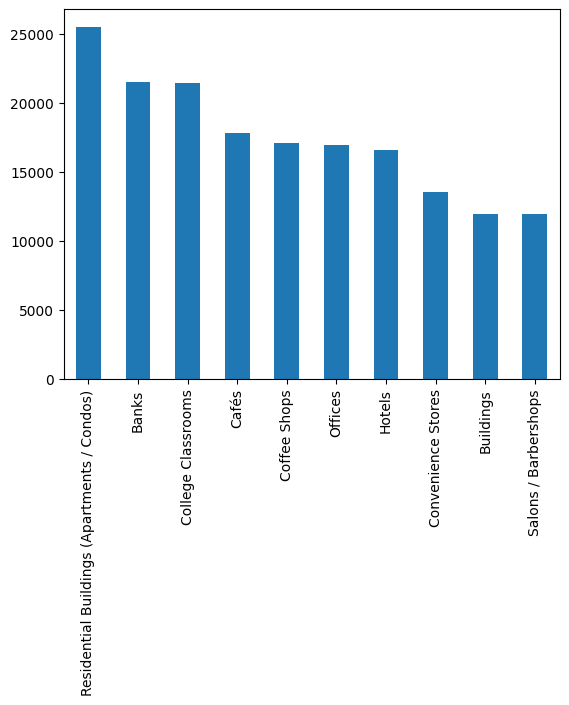

In [213]:
feature_overview("categories")

## point_of_interest

2024-06-09 15:24:41.955 | INFO     | __main__:feature_overview:2 - number of Missing Values: 0
2024-06-09 15:24:42.035 | INFO     | __main__:feature_overview:3 - Percent of Missing Values: 0.0%
2024-06-09 15:24:43.066 | INFO     | __main__:feature_overview:5 - P_fb339198a31db3    332
P_3a3fbd26e16269    199
P_f70a0977377171    166
P_9290e406eb58ac    145
P_fbe61733fcdebe    132
P_59cb47cbf3a432    130
P_f82d146eaf21da    120
P_40323f7f948c18    120
P_f8a0cd160eec80    119
P_6c385e5fd3a4b7    119
P_35db41d5e6fe17    115
P_9ca6f5784b5b37    115
P_16f3e1dfab51fa    106
P_ed155db12f35d7    105
P_bee1aae475d656    103
P_d2c3738f7e1882     99
P_f2f1b7b21e5b87     92
P_e953e34e177117     91
P_745299120115a1     90
P_2577c676e4ccf8     87
P_7c5f67c96b0d53     80
P_aab187db71cff5     78
P_247d2b3ab0c8a1     76
P_478cef4f217a6b     75
P_ae96252a6a9380     75
P_162d8569d0fe9b     74
P_12d9ff56ec1610     73
P_92a646e12139bb     72
P_f2df149bcb3843     71
P_9e9a7f44fabe9d     66
Name: point_of_inte

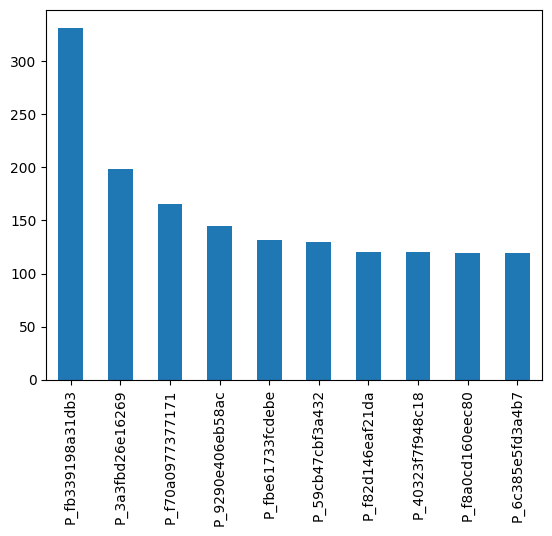

In [214]:
feature_overview("point_of_interest")